In [1]:
# Import the dataset
import pandas as pd

filepath = r'C:/Users/User/Desktop/Datasets/twitter_classification_project/random_tweets.json'
all_tweets = pd.read_json(filepath, encoding = "Latin-1", lines=True)

In [2]:
# Examine the dataset
print(all_tweets.shape[0]) # Number of rows in the dataset
print(all_tweets.columns.tolist()) # List of columns in the dataset
print(all_tweets.loc[0]['text']) # The 'text' column contain the tweet
print(all_tweets.loc[0]["user"]) #Print the first row of the 'user' column here

11099
['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str', 'extended_entities', 'quoted_status', 'withheld_in_countries']
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'friends_count': 335, 'listed_count': 2, 'created_at': 'Tue May 18 21:30:10 +0000 2010', 'favouri

In [3]:
# Sort data to take note of tweets with highest retweet count
tweets_sorted = all_tweets.sort_values(by="retweet_count", ascending=False)
print(tweets_sorted[['text', 'retweet_count']].head(20))

                                                    text  retweet_count
5584   RT @amymcollum: I know she isn't your daughter...         413719
6185   RT @taylorshenk: do coke and pepsi taste the s...         173062
6454   RT @taylorshenk: do coke and pepsi taste the s...         173061
9271   RT @taylorshenk: do coke and pepsi taste the s...         173061
4821   RT @taylorshenk: do coke and pepsi taste the s...         173060
6174   RT @juannisaac: move the bowl please https://t...         168485
4550   RT @juannisaac: move the bowl please https://t...         168484
8460   RT @itstae13: Stop getting rid of your pets be...         162433
7198   RT @itstae13: Stop getting rid of your pets be...         162431
4889   RT @itstae13: Stop getting rid of your pets be...         162428
3311   RT @itstae13: Stop getting rid of your pets be...         162425
3741   RT @itstae13: Stop getting rid of your pets be...         162425
1599   RT @itstae13: Stop getting rid of your pets be...        

In [4]:
# Noticed significant number of duplicates, to drop duplicates in 'text' column
tweets_dropped = all_tweets.drop_duplicates(subset=['text'])
print(tweets_dropped.shape[0]) 

9221


In [5]:
# Noticed number of rows reduced from 11,099 to 9,221
# Sort data to take note of tweets with highest retweet count again to ensure no duplicates this time
all_tweets = tweets_dropped.sort_values(by="retweet_count", ascending=False)
print(all_tweets[['text', 'retweet_count']].head(20)) 

                                                    text  retweet_count
5584   RT @amymcollum: I know she isn't your daughter...         413719
4821   RT @taylorshenk: do coke and pepsi taste the s...         173060
4550   RT @juannisaac: move the bowl please https://t...         168484
7      RT @itstae13: Stop getting rid of your pets be...         162420
1297   RT @thegreatkhalid: The power of music is craz...         140538
1504   RT @Clement_Grosset: I adjusted the audio as i...         112869
5766   RT @kim_rooz: Why is there always free shit fo...          94965
5396   RT @1ShawnT: Twitter deleted my video so here ...          91076
9764   RT @dannelxo: a bunch of trees chilling in the...          89348
9311   RT @MuenchowGriffin: i’m dating my favorite pe...          85216
9567   RT @RelktntHero: He saw what the world had to ...          84130
646    RT @NataliaEmilie: Me when the less I know the...          82765
663    RT @missberray: This the worst news I’ve heard...        

In [6]:
# Statistical details of the number of retweets column
print(all_tweets["retweet_count"].describe())

count      9221.000000
mean       1130.735604
std        7826.053963
min           0.000000
25%           0.000000
50%           3.000000
75%         125.000000
max      413719.000000
Name: retweet_count, dtype: float64


In [7]:
import numpy as np

# We set a retweet count of over 100 as a viral tweet
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > 100, 1, 0)
print(all_tweets['is_viral'].value_counts())

0    6776
1    2445
Name: is_viral, dtype: int64


In [8]:
# Making features (to amend here to update features)

all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)
all_tweets['links_count'] = all_tweets.apply(lambda tweet: tweet['text'].count('http'), axis=1)
all_tweets['words_count'] = all_tweets.apply(lambda tweet: len(tweet['text'].split()), axis=1)
all_tweets['average_length_count'] = all_tweets.apply(lambda tweet: sum(len(word) for word in tweet['text'].split()) / len(tweet['text'].split()) , axis=1)
all_tweets['capital_letters_count'] = all_tweets['text'].apply(lambda x: sum(1 for c in x if c.isupper()))
all_tweets['exclamation_count'] = all_tweets['text'].apply(lambda x: sum(1 for c in x if c == '!'))

features_names = ['tweet_length', 'followers_count', 'friends_count', 'links_count', 'words_count', 'average_length_count', 'capital_letters_count', 'exclamation_count']
features_and_labels_names = features_names + ['is_viral', 'retweet_count']

print(all_tweets[features_and_labels_names].head())
print(all_tweets[features_and_labels_names].describe())

      tweet_length  followers_count  friends_count  links_count  words_count  \
5584           140              943            748            0           22   
4821           113              274            627            0           21   
4550            60               79             73            1            7   
7              139              113            120            0           23   
1297           121              758            530            1           18   

      average_length_count  capital_letters_count  exclamation_count  \
5584              5.409091                     15                  0   
4821              4.333333                      2                  0   
4550              7.714286                      8                  0   
7                 5.086957                      4                  0   
1297              5.777778                      7                  0   

      is_viral  retweet_count  
5584         1         413719  
4821         1        

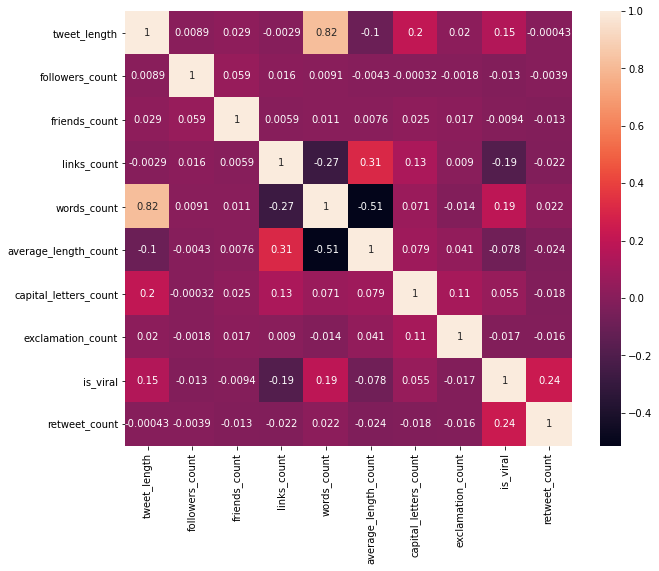

In [9]:
# Examine features relationship with the label
import matplotlib.pyplot as plt
import seaborn as sns

Var_Corr = all_tweets[features_and_labels_names].corr()
# plot the heatmap and annotation on it
plt.figure(figsize=(10,8))
sns.heatmap(Var_Corr, xticklabels=features_and_labels_names, yticklabels=features_and_labels_names, annot=True)

In [10]:
# There is a small postive correlation between is_viral and with tweet_length and words_count and 
# a small negative correlation between is_viral and with links_count

# Normalising the data
from sklearn.preprocessing import scale

labels = all_tweets['is_viral']
data = all_tweets[features_names]
scaled_data = scale(data, axis=0)
print(data.loc[0])
print(scaled_data[0])

tweet_length             140.000000
followers_count          215.000000
friends_count            335.000000
links_count                0.000000
words_count               26.000000
average_length_count       4.423077
capital_letters_count     11.000000
exclamation_count          0.000000
Name: 0, dtype: float64
[ 0.63319399 -0.02724354 -0.09154727 -0.81256356  0.49582324 -0.14034157
  0.42413665 -0.1927157 ]


In [11]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size=0.2, random_state=1)

In [12]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_data, train_labels)

from sklearn.metrics import accuracy_score

predictions = log_reg.predict(test_data)
print(accuracy_score(test_labels, predictions))

0.7371273712737128


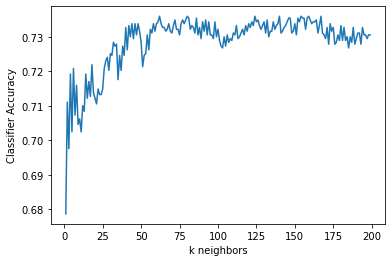

In [13]:
# Train k-Nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier


scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))

# Plot classifier accuracy over a range of k
plt.plot(range(1,200), scores)
plt.xlabel('k neighbors')
plt.ylabel('Classifier Accuracy')
plt.show()

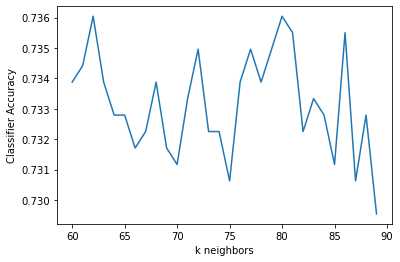

In [14]:
# Plot classifier accuracy over a range of k from 60 to 90
scores = []
for k in range(60, 90):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
    
plt.plot(range(60, 90), scores)
plt.xlabel('k neighbors')
plt.ylabel('Classifier Accuracy')
plt.show()

In [15]:
# Logistic regression model produces accuracy of 73.7% on the test set
# k Neighbors classifier with k = 62 gives the highest accuracy at 73.6% on the test set